# 使用simupy来仿真pid控制系统

- 代码来自：[示例](https://github.com/simupy/simupy/blob/master/examples/pid.py)
- 仓库：<https://github.com/simupy/simupy>
- 文档：<https://simupy.readthedocs.io/en/latest/index.html>

In [1]:
import numpy as np
from scipy import signal, linalg
from simupy.systems import LTISystem, SystemFromCallable
from simupy.block_diagram import BlockDiagram
import matplotlib.pyplot as plt

## 创建被控对象

In [2]:
# construct second order system state and input matrices
m = 1
d = 1
b = 1
k = 1
Ac = np.c_[[0, -k/m], [1, -b/m]]
Bc = np.r_[0, d/m].reshape(-1, 1)

# augment state and input matrices to add integral error state
A_aug = np.hstack((np.zeros((3,1)), np.vstack((np.r_[1, 0], Ac))))
B_aug = np.hstack(( np.vstack((0, Bc)), -np.eye(3,1)))

# construct system
aug_sys = LTISystem(A_aug, B_aug,)

In [3]:
# construct PID system
Kc = 1
tau_I = 1
tau_D = 1
K = -np.r_[Kc/tau_I, Kc, Kc*tau_D].reshape((1,3))
pid = LTISystem(K)

## 仿真

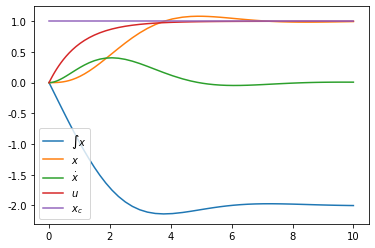

In [4]:
# construct reference
ref = SystemFromCallable(lambda *args: np.ones(1), 0, 1)

# create block diagram
BD = BlockDiagram(aug_sys, pid, ref)
BD.connect(aug_sys, pid) # PID requires feedback
BD.connect(pid, aug_sys, inputs=[0]) # PID output to system control input
BD.connect(ref, aug_sys, inputs=[1]) # reference output to system command input

res = BD.simulate(10) # simulate
# plot
plt.figure()
plt.plot(res.t, res.y[:, 0], label=r'$\int x$')
plt.plot(res.t, res.y[:, 1], label='$x$')
plt.plot(res.t, res.y[:, 2], label=r'$\dot{x}$')
plt.plot(res.t, res.y[:, 3], label='$u$')
plt.plot(res.t, res.y[:, 4], label='$x_c$')
plt.legend()
plt.show()